In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import os
from pathlib import Path

import torch

DATA_PATH = Path(os.path.abspath("")) / "../data"

patches = []

# Load patch image paths and features.
for county in (DATA_PATH / "patch_features/virginia").iterdir():
    for patch in county.iterdir():
        image_path = (
            DATA_PATH
            / "patches/virginia"
            / county.name
            / patch.name.replace(".pt", ".png")
        )
        patches.append(
            {
                "county": county.name,
                "name": patch.name.replace(".pt", ""),
                "data": torch.load(patch),
                "image_path": image_path,
            }
        )


/var/folders/pt/45xmzdh176jcsmxv9vb4by_c0000gn/T/ipykernel_63499/1306816687.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  "data": torch.load(patch),


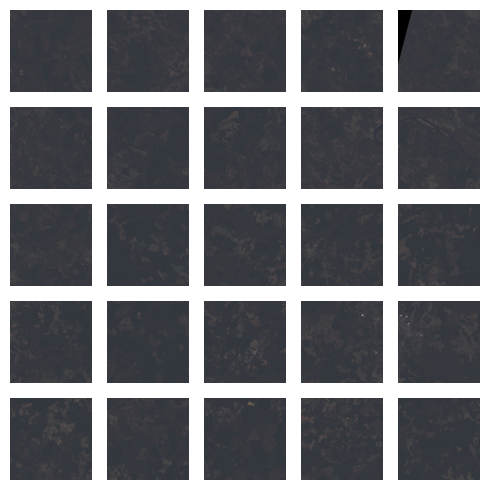

In [12]:
# Visualize a grid of the patches.

import matplotlib.pyplot as plt
import PIL.Image

fig, axs = plt.subplots(5, 5, figsize=(5, 5))

for i in range(25):
    ax = axs[i // 5, i % 5]
    ax.imshow(PIL.Image.open(patches[i]["image_path"]))
    ax.axis("off")

plt.tight_layout()
plt.show()


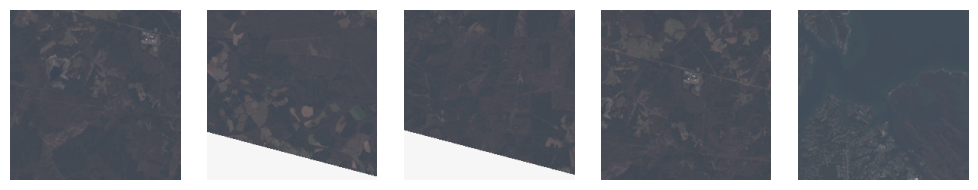

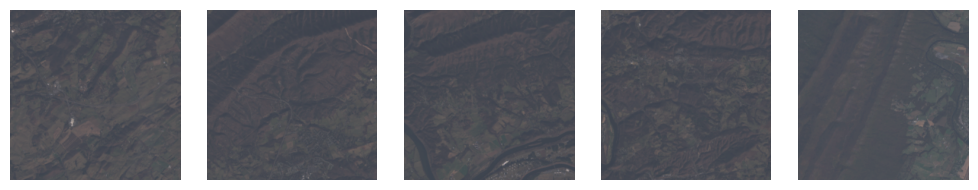

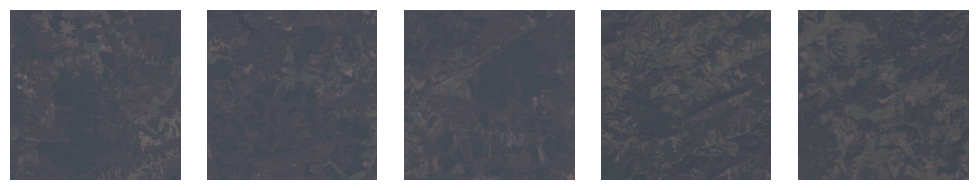

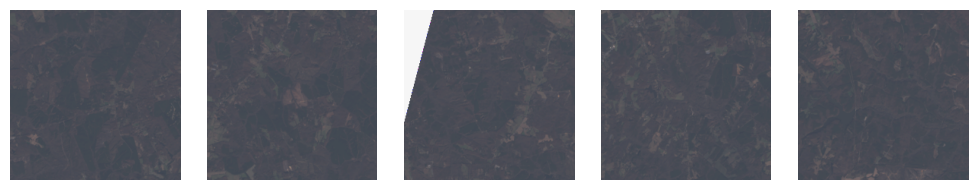

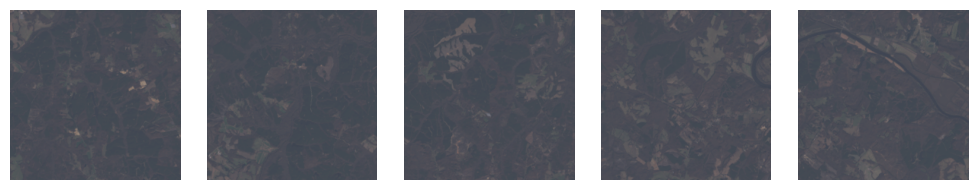

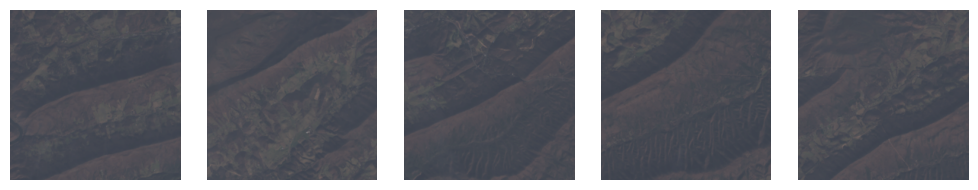

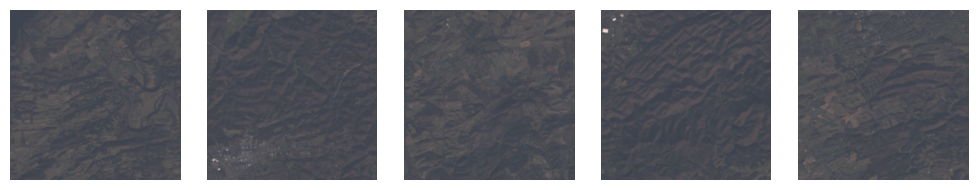

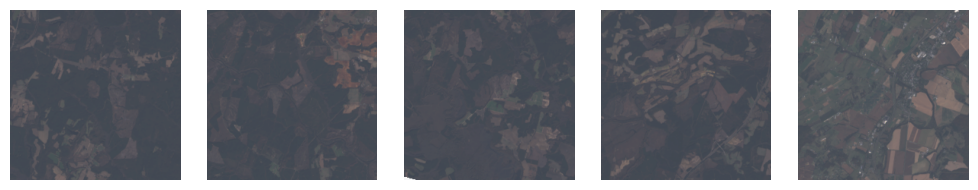

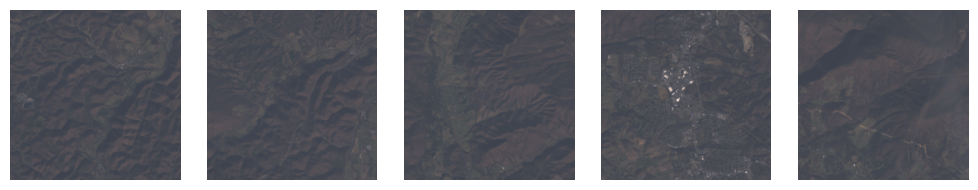

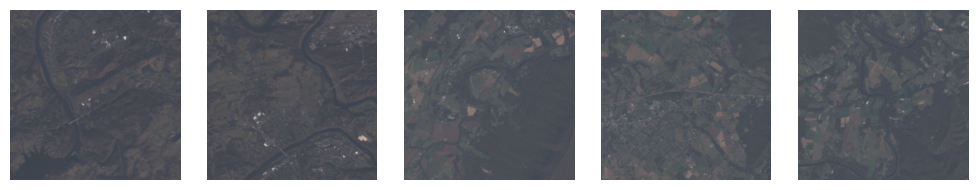

In [31]:
# Now, we want to cluster the patches based on their features.
# We will use K-means for this.

from sklearn.cluster import KMeans
import numpy as np

# Concatenate all patch features into a single tensor.
features = torch.stack([patch["data"] for patch in patches], dim=0)

# Perform K-means clustering.
kmeans = KMeans(n_clusters=10, random_state=0).fit(features)

# Assign each patch to a cluster.
for i, patch in enumerate(patches):
    patch["cluster"] = kmeans.labels_[i]

# Visualize the clusters.
for cluster in range(10):
    fig, axs = plt.subplots(1, 5, figsize=(10, 2))

    matching_patches = [p for p in patches if p["cluster"] == cluster]

    for i in range(5):
        ax = axs[i]
        patch = matching_patches[i]
        image = PIL.Image.open(patch["image_path"])
        image_np = np.array(image)

        # Increase the contrast of the image
        image_np = np.clip(image_np * 1.5, 0, 255).astype(np.uint8) - 10

        ax.imshow(image_np)
        ax.axis("off")

    plt.tight_layout()
    plt.show()



In [41]:
# Training based on example data.

import pandas as pd

data = pd.read_csv("parser/table25.csv")
data


,crop_type,geographic_area,2022_farms,2022_acres,2022_quantity,2022_irrigated_farms,2022_irrigated_acres,2017_farms,2017_acres,2017_quantity,2017_irrigated_farms,2017_irrigated_acres,Unnamed: 12
0,CORN FOR GRAIN (BUSHELS),Accomack,50,22155,3074692,5.0,2087,52.0,18890,3219578,7,2245,NaN
1,CORN FOR GRAIN (BUSHELS),Albemarle,15,968,133380,3.0,7,16.0,1449,165839,NaN,NaN,NaN
2,CORN FOR GRAIN (BUSHELS),Alleghany,1,(D),(D),NaN,NaN,NaN,10,146,19408,NaN,NaN
3,CORN FOR GRAIN (BUSHELS),Amelia,30,4277,607251,NaN,NaN,NaN,41,4371,570992,NaN,NaN
4,CORN FOR GRAIN (BUSHELS),Amherst,1,(D),(D),NaN,NaN,NaN,1,(D),(D),NaN,NaN
5,CORN FOR GRAIN (BUSHELS),Appomattox,11,1132,151613,NaN,NaN,NaN,16,534,64870,NaN,NaN
6,CORN FOR GRAIN (BUSHELS),Augusta,187,15862,2577825,1.0,(D),187.0,19130,3018206,4,334,NaN
7,CORN FOR GRAIN (BUSHELS),Bath,3,52,6984,NaN,NaN,NaN,6,299,34444,NaN,NaN
8,CORN FOR GRAIN (BUSHELS),Bedford,16,1475,205144,NaN,NaN,NaN,7,488,62986,1,(D)
9,CORN FOR GRAIN (BUSHELS),Bland,8,369,55210,2.0,(D),5.0,(D),(D),NaN,NaN,NaN


In [45]:
corn = data[['geographic_area', '2022_quantity', '2022_acres']]
corn['2022_quantity'][corn['2022_quantity'] == '(D)'] = "NaN"
corn['2022_acres'][corn['2022_acres'] == '(D)'] = "NaN"
corn['2022_quantity'] = corn['2022_quantity'].astype(float)
corn['2022_acres'] = corn['2022_acres'].astype(float)
bushels_per_acre = corn['2022_quantity'] / corn['2022_acres']
corn['bushels_per_acre'] = bushels_per_acre

/var/folders/pt/45xmzdh176jcsmxv9vb4by_c0000gn/T/ipykernel_63499/787961153.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  corn['2022_quantity'][corn['2022_quantity'] == '(D)'] = "NaN"
/var/folders/pt/45xmzdh176jcsmxv9vb4by_c0000gn/T/ipy

In [46]:
corn

,geographic_area,2022_quantity,2022_acres,bushels_per_acre
0,Accomack,3074692.0,22155.0,138.780952
1,Albemarle,133380.0,968.0,137.789256
2,Alleghany,NaN,NaN,NaN
3,Amelia,607251.0,4277.0,141.980594
4,Amherst,NaN,NaN,NaN
5,Appomattox,151613.0,1132.0,133.933746
6,Augusta,2577825.0,15862.0,162.515761
7,Bath,6984.0,52.0,134.307692
8,Bedford,205144.0,1475.0,139.080678
9,Bland,55210.0,369.0,149.620596


In [82]:
corn['bushels_per_acre'].std()

np.float64(30.357463237243838)

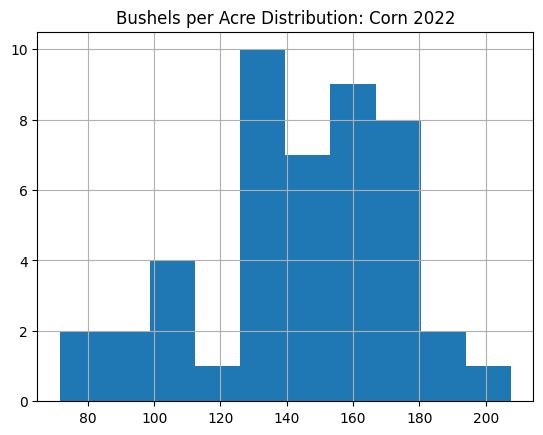

In [49]:
# Plotting distribution of bushels per acre

plt.title("Bushels per Acre Distribution: Corn 2022")
corn['bushels_per_acre'].hist(bins=10)
plt.show()


In [63]:
# Create (X, y) pairs for training.

X_regress = []
X_exists = []
y_regress = []
y_exists = []

for patch in patches:
    county = patch["county"]
    vals = corn[corn["geographic_area"].str.lower() == county]["bushels_per_acre"].values

    X_exists.append(patch['data'])
    if len(vals) > 0:
        y_exists.append(1)
        if not np.isnan(vals[0]):
            X_regress.append(patch["data"])
            y_regress.append(vals[0])
    else:
        y_exists.append(0)

X_regress = torch.stack(X_regress, dim=0).float()
y_regress = torch.tensor(y_regress).unsqueeze(1).float()
X_exists = torch.stack(X_exists, dim=0).float()
y_exists = torch.tensor(y_exists).unsqueeze(1).float()



In [73]:
# Train a quick model.


class Tinymodel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(512, 1)

    def forward(self, x):
        return self.fc1(x)


m = Tinymodel()
o = torch.optim.Adam(m.parameters(), lr=0.01)

# X_regress_train = X_regress[:int(0.8 * len(X_regress))]
# y_regress_train = y_regress[:int(0.8 * len(y_regress))]
# X_regress_val = X_regress[int(0.8 * len(X_regress)):]
# y_regress_val = y_regress[int(0.8 * len(y_regress)):]

for i in range(1000):
    # for batch_i in range(0, len(X_regress), 32):
    #     X_batch = X_regress[batch_i:batch_i + 32]
    #     y_batch = y_regress[batch_i:batch_i + 32]
    #     y_pred = m(X_batch)
    #     # loss = torch.nn.functional.mse_loss(y_pred, y_batch)
    #     o.zero_grad()
    #     loss.backward()
    #     o.step()

    for batch_i in range(0, len(X_exists), 32):
        X_batch = X_exists[batch_i : batch_i + 32]
        y_batch = y_exists[batch_i : batch_i + 32]
        y_pred = m(X_batch)
        loss = torch.nn.functional.binary_cross_entropy_with_logits(y_pred, y_batch)
        o.zero_grad()
        loss.backward()
        o.step()

    if i % 100 == 0:
        print(f"Cross-entropy: {loss.item()}")

Cross-entropy: 0.004307746887207031
Cross-entropy: 0.0021886825561523438


KeyboardInterrupt: 

In [79]:
(torch.sigmoid(m(X_exists)).round() == y_exists).float().mean()

tensor(0.6129)

In [81]:
y_exists.mean()

tensor(0.5596)